DEV NOTEBOOK
---

Bike sharing model evaluation
---

Exercise: Load train/test sets
---

> **Exercise**: Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `users` columns. Plot the data points.

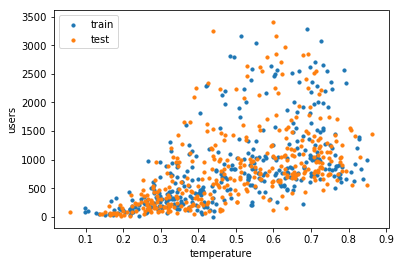

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load data sets
train_df = pd.read_csv("data/bike-train.csv")
test_df = pd.read_csv("data/bike-test.csv")

# Create x/y Numpy arrays
x_tr = train_df.temp.values
y_tr = train_df.users.values

x_te = test_df.temp.values
y_te = test_df.users.values

# Plot data points
plt.scatter(x_tr, y_tr, label='train', s=10)
plt.scatter(x_te, y_te, label='test', s=10)
plt.xlabel("temperature")
plt.ylabel("users")
plt.legend(loc = 'upper left')
plt.show()

Exercise: Fit and compare different models
---

> **Exercise**: (A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [13]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

linear regression:408.823
polyfit(deg=2):406.667
with huber loss:383.694


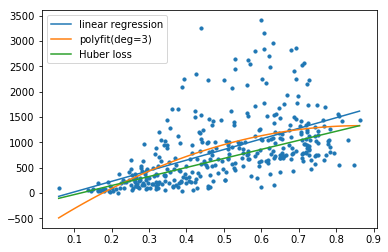

In [34]:
# (A) Test different models
from sklearn.linear_model import HuberRegressor

# Simple linear regression
coefs_lr = np.polyfit(x_tr, y_tr, deg=1)
y_pred_lr = np.polyval(coefs_lr, x_te) # Predictions for test data points

# polynomial regression of degree 2
coefs_pol2 = np.polyfit(x_tr, y_tr, deg=2)
y_pred_pol2 = np.polyval(coefs_pol2, x_te)

# Linear regression with huber loss
# Create object
lr_huber = HuberRegressor(epsilon=1.1)
# Fit it
lr_huber.fit(x_tr[:, np.newaxis], y_tr)
# Compute predictions
y_pred_huber = lr_huber.predict(x_te[:, np.newaxis])

# MAE
mae_lr = MAE(y_te, y_pred_lr)
mae_poly2 = MAE(y_te, y_pred_pol2)
mae_huber = MAE(y_te, y_pred_huber)

# Print values
print('linear regression:{:.3f}'.format(mae_lr))
print('polyfit(deg=2):{:.3f}'.format(mae_poly2)) 
print('with huber loss:{:.3f}'.format(mae_huber)) 

# Plot the prediction curves
# Generate a hundred points
x_values = np.linspace(min(x_te), max(x_te), num=100)

# and the predictions
y_values_lr = np.polyval(coefs_lr, x_values)
y_values_poly2 = np.polyval(coefs_pol2, x_values)
y_values_huber = lr_huber.predict(x_values[:, np.newaxis])

# Plot them
plt.scatter(x_te, y_te, s=10)
plt.plot(x_values, y_values_lr, label='linear regression')
plt.plot(x_values, y_values_poly2, label='polyfit(deg=3)')
plt.plot(x_values, y_values_huber, label='Huber loss')
plt.legend()
plt.show()

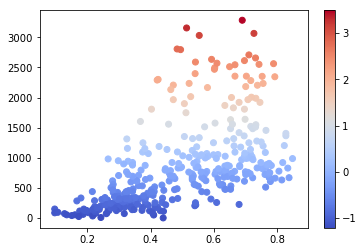

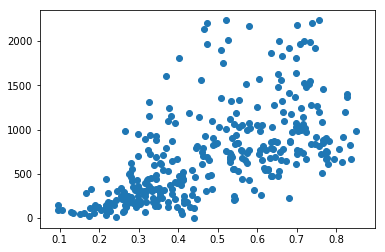

In [33]:
# (B) Remove outliers
# Compute z-scores
z_scores = (y_tr - y_tr.mean()) / y_tr.std()

# Plot them
plt.scatter(x_tr, y_tr, c=z_scores, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

idx = (np.abs(z_scores) > 2)
x_wo = x_tr[~idx]
y_wo = y_tr[~idx]

# Plot the remaining points
plt.scatter(x_wo, y_wo)
plt.show()

linear regression: 300.621161270228
polyfit(deg=2): 297.00464653926485
with huber loss: 285.6746315839127
baseline: 400.92035398230087


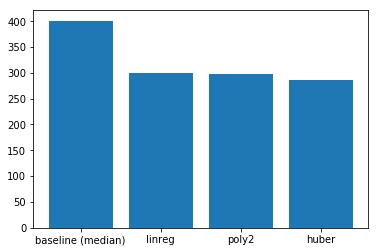

In [36]:
# (C) Final comparison
# compute Baseline model
pred_baseline = np.median(y_wo) 

# Simple linear regression
coefs_lr = np.polyfit(x_wo, y_wo, deg=1)
y_pred_lr = np.polyval(coefs_lr, x_wo)

# polynomial regression of degree 2
coefs_pol2 = np.polyfit(x_wo, y_wo, deg=2)
y_pred_pol2 = np.polyval(coefs_pol2, x_wo)

# Linear regression with huber loss
# Create object
lr_huber = HuberRegressor(epsilon=1.1)
# Fit it
lr_huber.fit(x_wo[:, np.newaxis], y_wo)
# Compute predictions
y_pred_huber = lr_huber.predict(x_wo[:, np.newaxis])


mae_lr = MAE(y_wo, y_pred_lr)
mae_poly2 = MAE(y_wo, y_pred_pol2)
mae_huber = MAE(y_wo, y_pred_huber)
mae_baseline = MAE(y_wo, pred_baseline)

# Print values
print('linear regression:', mae_lr)
print('polyfit(deg=2):', mae_poly2) 
print('with huber loss:', mae_huber)
print('baseline:', mae_baseline)

# Bar chart
plt.bar([1, 2, 3, 4], [mae_baseline, mae_lr, mae_poly2, mae_huber])
plt.xticks([1, 2, 3, 4], ['baseline (median)', 'linreg', 'poly2', 'huber'])
plt.show()
